In [5]:
# !pip install numpy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [1]:
!which python

/home/murali/anaconda3/envs/myenv/bin/python


In [65]:
print(cv2.__version__)

4.10.0


In [2]:
# !conda info --envs

# conda environments:
#
base                  *  /Users/sreekanthgopi/miniconda3
                         /Users/sreekanthgopi/opt/anaconda3/envs/AutoGPT
                         /Users/sreekanthgopi/opt/anaconda3/envs/AutoGPT2
                         /Users/sreekanthgopi/opt/anaconda3/envs/FaceNet
                         /Users/sreekanthgopi/opt/anaconda3/envs/MMMMusic
                         /Users/sreekanthgopi/opt/anaconda3/envs/TopicGeneration
                         /Users/sreekanthgopi/opt/anaconda3/envs/audiocraft
                         /Users/sreekanthgopi/opt/anaconda3/envs/magenta
                         /Users/sreekanthgopi/opt/anaconda3/envs/muse_env



In [6]:
# !pip show numpy

In [7]:
# !pip install opencv-python


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
from scipy.signal import butter, filtfilt
from sklearn.decomposition import FastICA

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
# pip install mediapipe

Read 1000 frames.
1000 frames saved to file.


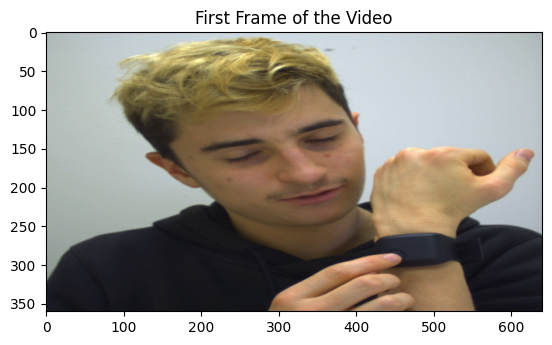

In [4]:
import cv2
import pickle
import os
import matplotlib.pyplot as plt

def read_video_frames(video_file, max_frames=1000):
    cap = cv2.VideoCapture(video_file)
    frames = []
    count = 0
    while count < max_frames and cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Stop if no frame is retrieved
        frames.append(frame)
        count += 1
    cap.release()
    print(f"Read {count} frames.")
    return frames

def display_first_frame(frames):
    if frames is not None and len(frames) > 0:
        frame_rgb = cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title("First Frame of the Video")
        plt.show()
    else:
        print("No frame to display.")

def load_or_read_video_frames(video_path, frames_filename='saved_framess2t1.pkl', max_frames=1000):
    # Check if frames are already saved to a file
    if os.path.isfile(frames_filename):
        # If frames are saved, load them from the file
        with open(frames_filename, 'rb') as file:
            frames = pickle.load(file)
        print("Frames loaded from file.")
    else:
        # If frames are not saved, read and store video frames
        frames = read_video_frames(video_path, max_frames)
        # Save the frames to a file for future use
        with open(frames_filename, 'wb') as file:
            pickle.dump(frames, file)
        print(f"{len(frames)} frames saved to file.")
    return frames

video_path = 'vid_s1_T2.mp4'
frames_filename = 'saved_framess2t1_T2.pkl'

frames = load_or_read_video_frames(video_path, frames_filename, max_frames=1000)
display_first_frame(frames)


In [5]:
len(frames)

1000

### Processed Frame with Face Mesh and Highlighted ROIs

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1718117737.118207  164521 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718117737.133051  164521 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


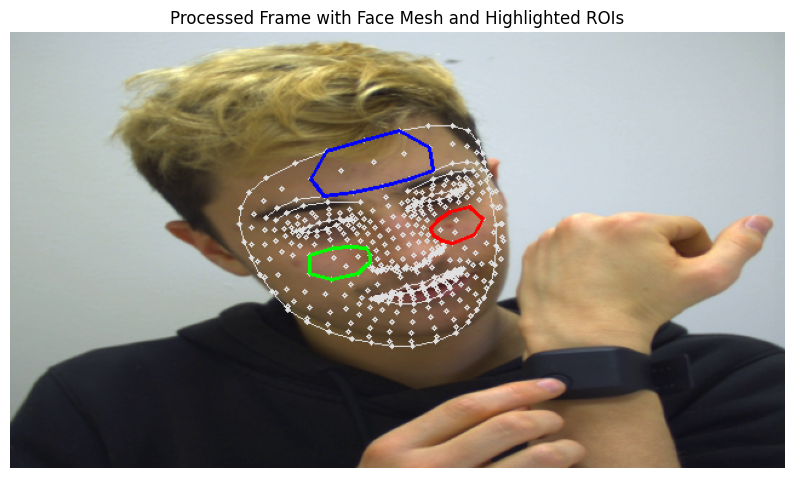

In [6]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe FaceMesh
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

# Specify the drawing specifications for visualization
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
def process_frames_and_extract_roi_values(frames):
    processed_frames = []
    roi_signals = {'forehead': [], 'left_cheek': [], 'right_cheek': []}

    with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
        for frame in frames:
            frame_copy = frame.copy()
            image_rgb = cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB)
            results_mesh = face_mesh.process(image_rgb)

            if results_mesh.multi_face_landmarks:
                for face_landmarks in results_mesh.multi_face_landmarks:
                    # Drawing the facial landmarks for visualization
                    mp_drawing.draw_landmarks(frame_copy, face_landmarks, mp_face_mesh.FACEMESH_CONTOURS, landmark_drawing_spec=drawing_spec, connection_drawing_spec=drawing_spec)

                    # For each ROI, calculate, store the mean pixel values, and draw the ROI
                    for name, indices in [('forehead', [107, 66, 69, 109, 10, 338, 299, 296, 336, 9]), 
                                          ('left_cheek', [118, 119, 100, 126, 209, 49, 129, 203, 205, 50]), 
                                          ('right_cheek', [347, 348, 329, 355, 429, 279, 358, 423, 425, 280])]:
                        # Extracting ROI pixels
                        roi_pixels = np.array([frame[int(face_landmarks.landmark[idx].y * frame.shape[0]), int(face_landmarks.landmark[idx].x * frame.shape[1])] for idx in indices])
                        mean_pixel_value = np.mean(roi_pixels, axis=0)
                        roi_signals[name].append(mean_pixel_value)

                        # Drawing ROI
                        points = np.array([[int(face_landmarks.landmark[idx].x * frame_copy.shape[1]), int(face_landmarks.landmark[idx].y * frame_copy.shape[0])] for idx in indices])
                        cv2.polylines(frame_copy, [np.array(points)], True, (255, 0, 0) if name == 'forehead' else (0, 255, 0) if name == 'left_cheek' else (0, 0, 255), 2)

            processed_frames.append(frame_copy)

    return processed_frames, roi_signals


processed_frames, roi_signals = process_frames_and_extract_roi_values(frames)

# Display one of the processed frames with ROIs
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(processed_frames[0], cv2.COLOR_BGR2RGB))
plt.title('Processed Frame with Face Mesh and Highlighted ROIs')
plt.axis('off')
plt.show()


In [7]:
print(f"Total frames read: {len(frames)}")

Total frames read: 1000


In [10]:
import pandas as pd

# Create DataFrame from roi_signals
roi_df = pd.DataFrame.from_dict(roi_signals)

# Save DataFrame to CSV
roi_df.to_csv('roi_signals_T2.csv', index=False)


In [9]:
# (processed_frames[0])

In [122]:
# import numpy as np
# import pandas as pd

# # Assuming processed_frames is a list of arrays
# # Flatten each array and concatenate them along the appropriate axis
# flattened_data = np.concatenate([arr.flatten().reshape(1, -1) for arr in processed_frames])

# # Convert the flattened data to a DataFrame
# processed_frames_df = pd.DataFrame(flattened_data)

# # Save DataFrame to CSV
# processed_frames_df.to_csv('processed_frames.csv', index=False)


In [11]:
len(roi_signals.keys())

3

In [12]:
print(f"Number of ROIs: {len(roi_signals.keys())}")
for roi, values in roi_signals.items():
    print(f"{roi}: {values[:5]}")  # Print first 5 values for each ROI


Number of ROIs: 3
forehead: [array([ 82.6, 114.8, 144.1]), array([ 80.7, 114.2, 142.9]), array([ 81. , 113.5, 141.9]), array([ 80.7, 113.3, 141.3]), array([ 79.8, 111.4, 139.8])]
left_cheek: [array([ 73.9, 103.2, 142.6]), array([ 76.3, 105.7, 146. ]), array([ 77. , 107. , 147.1]), array([ 78.3, 108.5, 148.4]), array([ 78.3, 109.7, 150.8])]
right_cheek: [array([ 84.3, 108.4, 150.6]), array([ 83.4, 110.9, 155.2]), array([ 84.8, 111.5, 154.8]), array([ 78.9, 107.4, 151.2]), array([ 80.6, 111.8, 156.5])]


In [13]:
print(f"Number of ROIs: {len(roi_signals.keys())}")
for roi, values in roi_signals.items():
    print(f"{roi}: {values[:5]}")  # Print first 5 values for each ROI
    print(f"Type of values in {roi}: {type(values[0])}")  # Check type of values for each ROI
    print(f"Type of values in {roi}: {values[0].dtype}")  # Check datatype of values for each ROI

Number of ROIs: 3
forehead: [array([ 82.6, 114.8, 144.1]), array([ 80.7, 114.2, 142.9]), array([ 81. , 113.5, 141.9]), array([ 80.7, 113.3, 141.3]), array([ 79.8, 111.4, 139.8])]
Type of values in forehead: <class 'numpy.ndarray'>
Type of values in forehead: float64
left_cheek: [array([ 73.9, 103.2, 142.6]), array([ 76.3, 105.7, 146. ]), array([ 77. , 107. , 147.1]), array([ 78.3, 108.5, 148.4]), array([ 78.3, 109.7, 150.8])]
Type of values in left_cheek: <class 'numpy.ndarray'>
Type of values in left_cheek: float64
right_cheek: [array([ 84.3, 108.4, 150.6]), array([ 83.4, 110.9, 155.2]), array([ 84.8, 111.5, 154.8]), array([ 78.9, 107.4, 151.2]), array([ 80.6, 111.8, 156.5])]
Type of values in right_cheek: <class 'numpy.ndarray'>
Type of values in right_cheek: float64


In [14]:
print(f"Type of values in {roi}: {values[0].dtype}")  # Check datatype of values for each ROI

Type of values in right_cheek: float64


In [15]:
if len(frames) > 0:
    print(f"First frame shape: {frames[0].shape}, dtype: {frames[0].dtype}")
else:
    print("No frames to display.")

First frame shape: (360, 640, 3), dtype: uint8


In [16]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    if len(data) < 3 * order:
        print("Data too short for this order, considering padding or lowering order.")
        order = min(order, len(data) // 3)
    b, a = butter(order, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')
    y = filtfilt(b, a, data, axis=0)
    return y

fs = 35  
lowcut = 0.65
highcut = 4.0


# Convert lists of pixel values into numpy arrays
for roi, signals_list in roi_signals.items():
    roi_signals[roi] = np.array(signals_list)

filtered_signals = {}

for roi, signals in roi_signals.items():
    if signals.shape[0] > 1:
        filtered_signal = np.zeros_like(signals)
        for i in range(signals.shape[1]):  # Filtering channel-wise
            filtered_signal[:, i] = butter_bandpass_filter(signals[:, i], lowcut, highcut, fs, order=6)
        filtered_signals[roi] = filtered_signal
    else:
        print(f"Not enough data for filtering {roi}, skipping.")
        filtered_signals[roi] = signals

# Print the filtered_signals dictionary
print("Filtered Signals:")
for roi, signals in filtered_signals.items():
    print(f"ROI: {roi}, Filtered Signals Shape: {signals.shape}")

Filtered Signals:
ROI: forehead, Filtered Signals Shape: (996, 3)
ROI: left_cheek, Filtered Signals Shape: (996, 3)
ROI: right_cheek, Filtered Signals Shape: (996, 3)


W0000 00:00:1718033613.958881  119999 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718033613.976372  119999 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


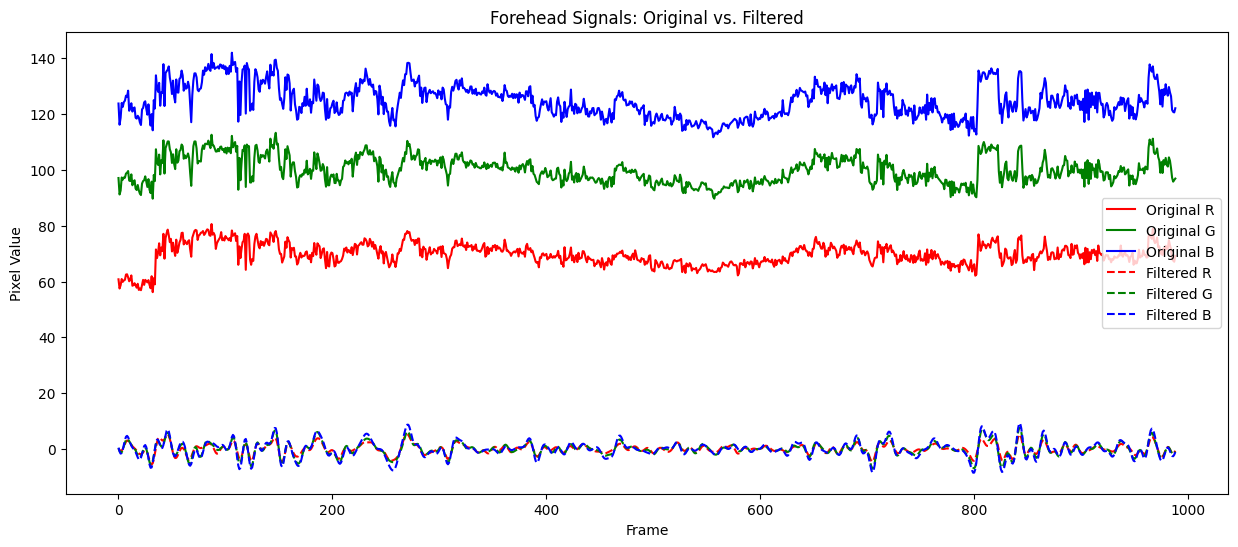

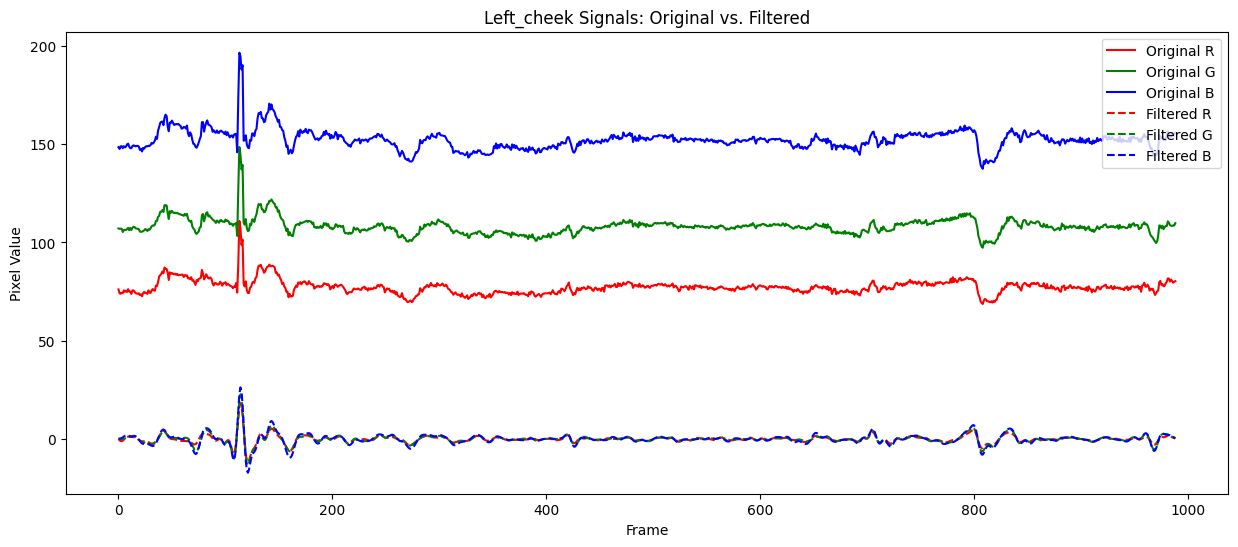

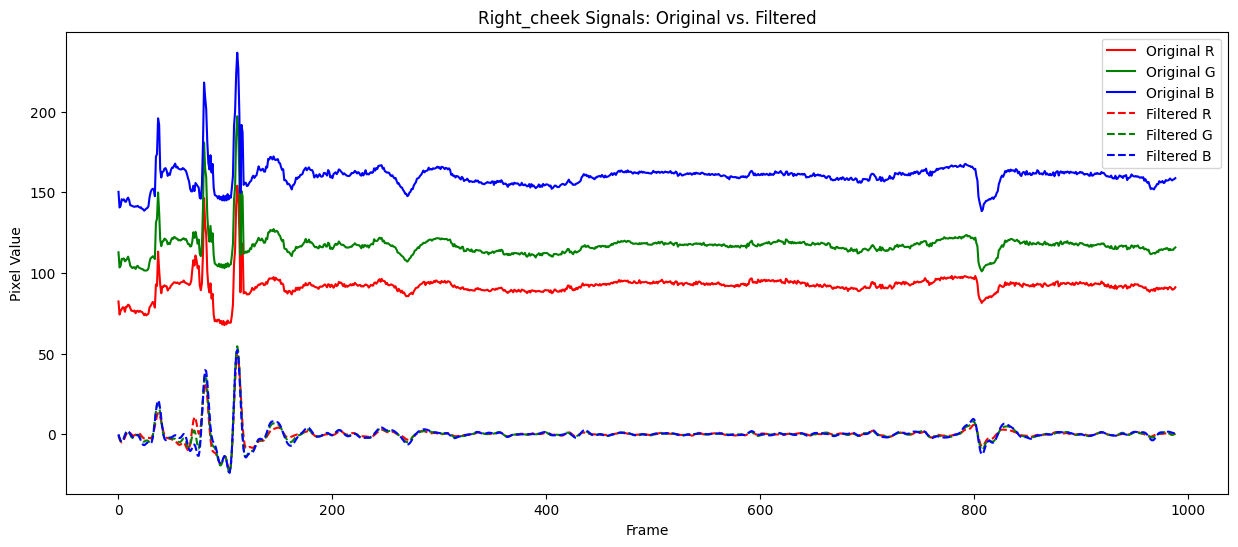

In [15]:
import matplotlib.pyplot as plt

def plot_signals(original_signals, filtered_signals, title):
    plt.figure(figsize=(15, 6))
    
    # Plotting the original signals
    plt.plot(original_signals[:, 0], 'r', label='Original R')
    plt.plot(original_signals[:, 1], 'g', label='Original G')
    plt.plot(original_signals[:, 2], 'b', label='Original B')
    
    # Plotting the filtered signals
    plt.plot(filtered_signals[:, 0], 'r--', label='Filtered R')
    plt.plot(filtered_signals[:, 1], 'g--', label='Filtered G')
    plt.plot(filtered_signals[:, 2], 'b--', label='Filtered B')
    
    plt.title(title)
    plt.xlabel('Frame')
    plt.ylabel('Pixel Value')
    plt.legend()
    plt.show()

processed_frames, roi_signals = process_frames_and_extract_roi_values(frames)

# Convert lists of pixel values into numpy arrays
for roi, signals_list in roi_signals.items():
    roi_signals[roi] = np.array(signals_list)

# Plot the signals before and after filtering for each ROI
for roi, original_signals in roi_signals.items():
    filtered_signals_roi = filtered_signals.get(roi)
    if filtered_signals_roi is not None:
        plot_signals(original_signals, filtered_signals_roi, f'{roi.capitalize()} Signals: Original vs. Filtered')
    else:
        print(f"No filtered signals available for {roi}. Skipping plotting.")


In [17]:
# Example diagnostic print for signals
for roi, signals in filtered_signals.items():
    print(f"{roi}: G Sample: {signals[:, 1][:5]}, R Sample: {signals[:, 0][:5]}, B Sample: {signals[:, 2][:5]}")

forehead: G Sample: [0.14367782 0.35356151 0.5432782  0.67228372 0.67387502], R Sample: [0.04361539 0.1367644  0.20174307 0.20077882 0.08771847], B Sample: [ 0.17433583 -0.0146832  -0.13512673 -0.16126608 -0.13327087]
left_cheek: G Sample: [0.2805585  2.13085561 3.65732727 4.61733426 4.90263579], R Sample: [0.14423227 1.81800202 3.19979927 4.06529062 4.30397241], B Sample: [0.29884095 2.35766291 4.05443149 5.12059544 5.44233472]
right_cheek: G Sample: [ 0.76522512  0.34074644 -0.34472505 -1.40903568 -2.7610376 ], R Sample: [ 0.29255674 -0.98302346 -2.49455546 -4.32811191 -6.34402604], B Sample: [ 0.49575436  0.86672861  0.89875085  0.4011515  -0.5877091 ]


In [18]:
import random

# Print random values from filtered_signals
for roi, signals in filtered_signals.items():
    if signals.shape[0] > 1:
        random_index = random.randint(0, signals.shape[0] - 1)
        random_value = signals[random_index]
        print(f"ROI: {roi}, Random Value at Index {random_index}: {random_value}")
    else:
        print(f"No data for {roi}, skipping.")


ROI: forehead, Random Value at Index 568: [1.127706   2.13349634 3.03462111]
ROI: left_cheek, Random Value at Index 83: [1.06724882 1.42502756 1.89631951]
ROI: right_cheek, Random Value at Index 512: [-0.52520141 -0.35821572 -0.08428661]


In [19]:
type(filtered_signals)

dict

In [20]:
import pandas as pd

# Flatten the nested lists in filtered_signals dictionary
flattened_signals = {roi + '_' + channel: [signal[i] for signal in signals for i in range(len(signal))] for roi, signals in filtered_signals.items() for channel in ['R', 'G', 'B']}

# Create DataFrame from flattened dictionary
filtered_df = pd.DataFrame.from_dict(flattened_signals)

# Save DataFrame to CSV file
filtered_csv_path = 'filtered_signals_T2.csv'
filtered_df.to_csv(filtered_csv_path, index=False)

print(f"Filtered signals saved to {filtered_csv_path}")


Filtered signals saved to filtered_signals_T2.csv


In [21]:
def plot_signals2(original_signals, filtered_signals, title):
    plt.figure(figsize=(15, 6))
    
    # Plotting the original signals
    plt.plot(original_signals[:, 0], 'r', label='Filtered R')
    
    # Plotting the filtered signals with an offset in the y-axis
    plt.plot(filtered_signals[:, 0] , 'r--', label='Detrended R (Offset)')
    
    plt.title(title)
    plt.xlabel('Frame')
    plt.ylabel('Pixel Value')
    plt.legend()
    plt.show()


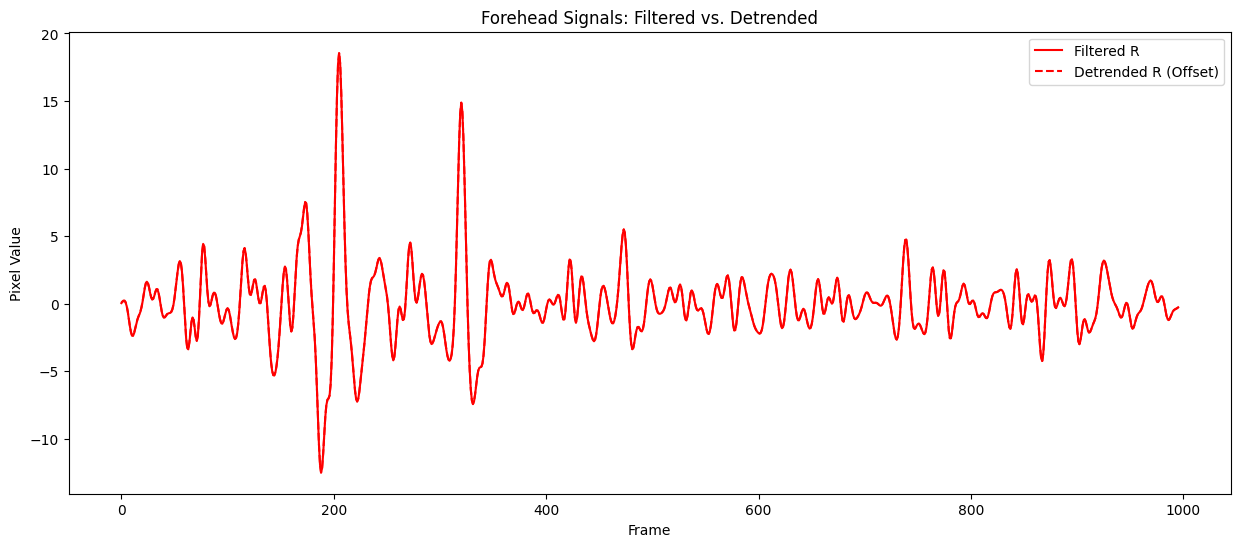

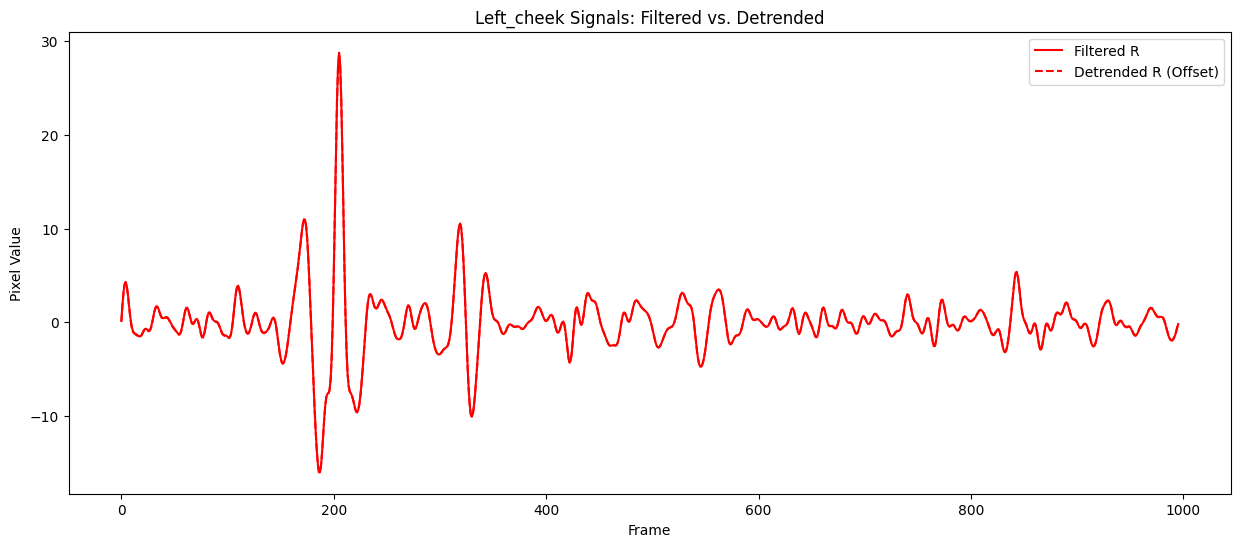

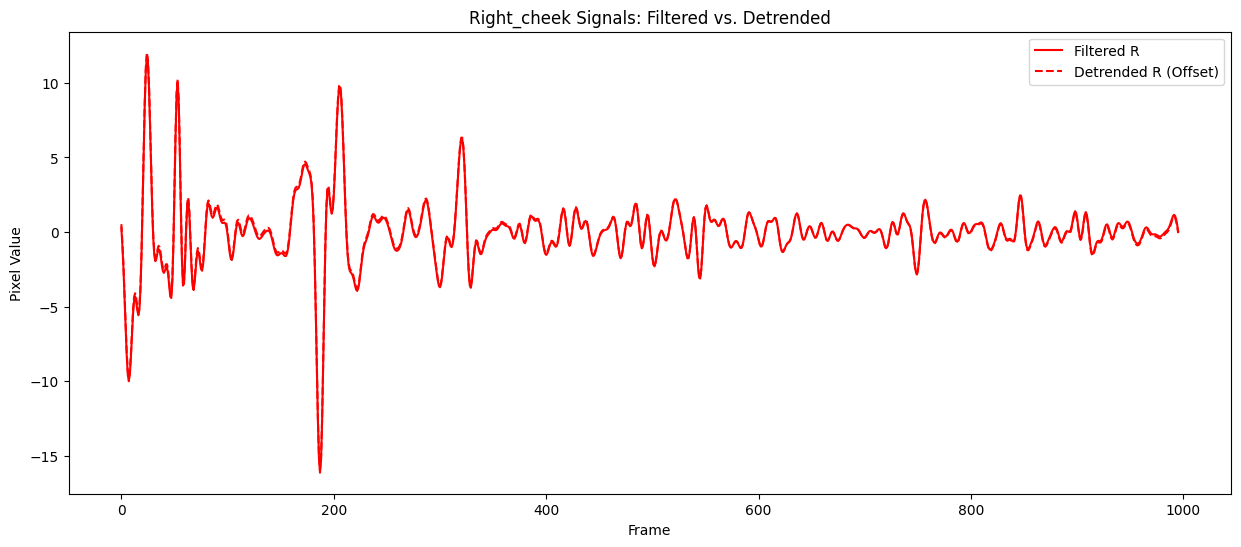

In [22]:
from scipy.signal import detrend

# Function to detrend the signals for each ROI
def detrend_roi_signals(filtered_signals):
    detrended_signals = {}
    for roi, signals in filtered_signals.items():
        detrended_signals[roi] = detrend(signals, axis=0)
    return detrended_signals

# Detrend the filtered signals for each ROI
detrended_signals = detrend_roi_signals(filtered_signals)

# Plot the detrended signals for each ROI
for roi, detrended_signal in detrended_signals.items():
    plot_signals2(filtered_signals[roi], detrended_signal, f'{roi.capitalize()} Signals: Filtered vs. Detrended')


In [23]:
type(detrended_signals)

dict

In [24]:
for roi, signals in detrended_signals.items():
    print(f"{roi}: {signals[:5]}")  # Print first 5 detrended values for each ROI


forehead: [[ 0.07403492  0.17417551  0.2176809 ]
 [ 0.16714614  0.38401113  0.02858479]
 [ 0.23208701  0.57367975 -0.09193583]
 [ 0.23108497  0.7026372  -0.11815226]
 [ 0.11798682  0.70418044 -0.09023414]]
left_cheek: [[0.07673929 0.20047475 0.20184488]
 [1.75063549 2.05090237 2.26083072]
 [3.13255918 3.57750454 3.95776317]
 [3.99817699 4.53764203 5.024091  ]
 [4.23698522 4.82307407 5.34599415]]
right_cheek: [[ 0.52783137  0.92174092  0.58844644]
 [-0.74811769  0.49700745  0.95924692]
 [-2.26001857 -0.18871883  0.99109537]
 [-4.09394388 -1.25328424  0.49332224]
 [-6.11022687 -2.60554095 -0.49571214]]


### Detrend the signals for each ROI

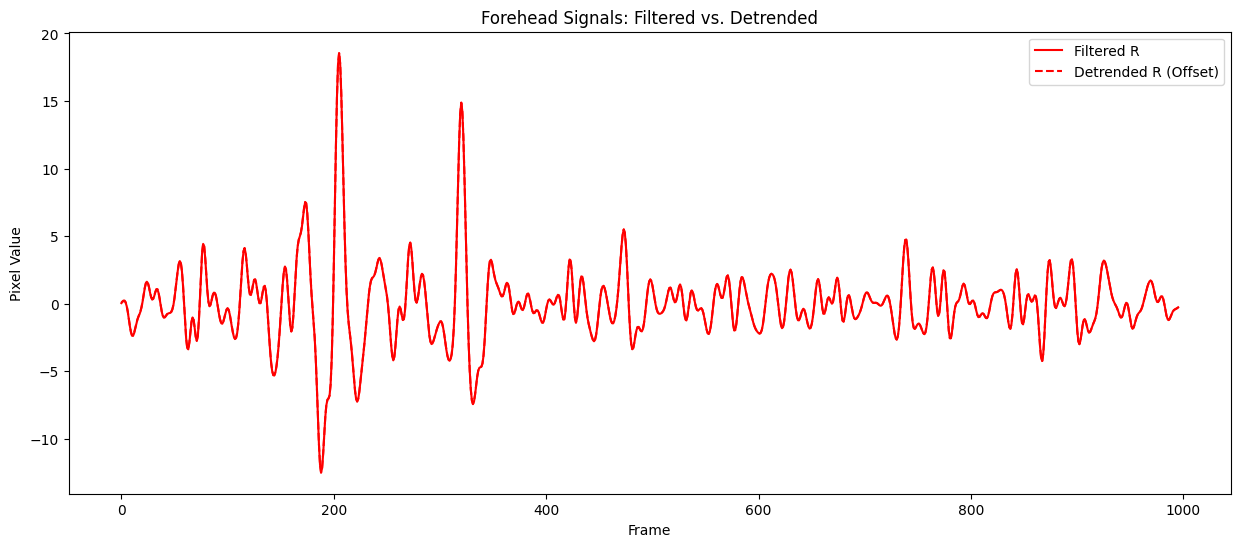

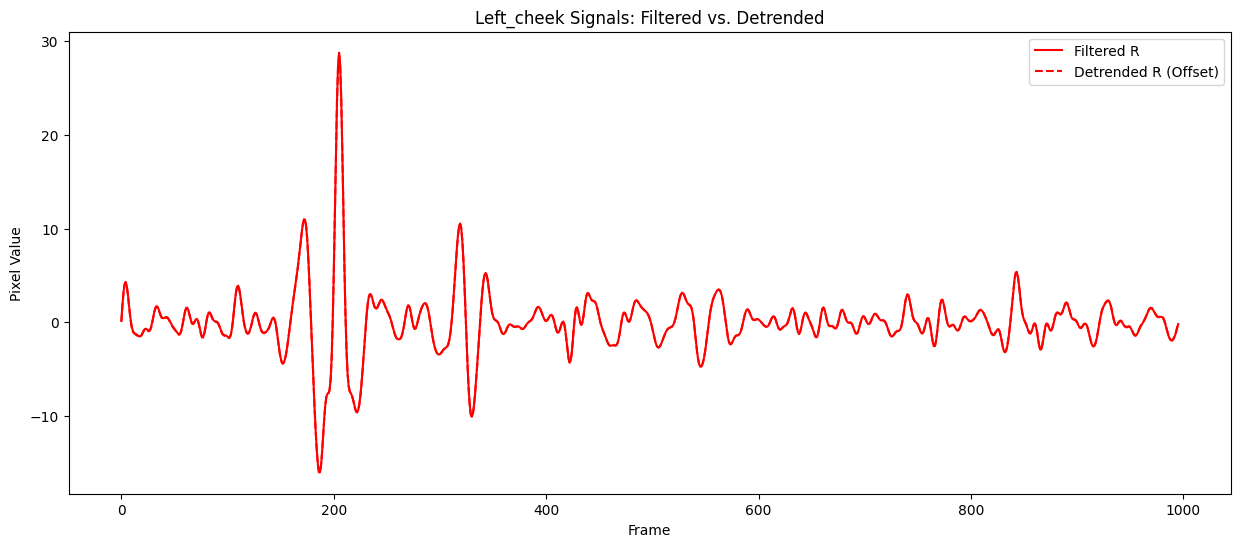

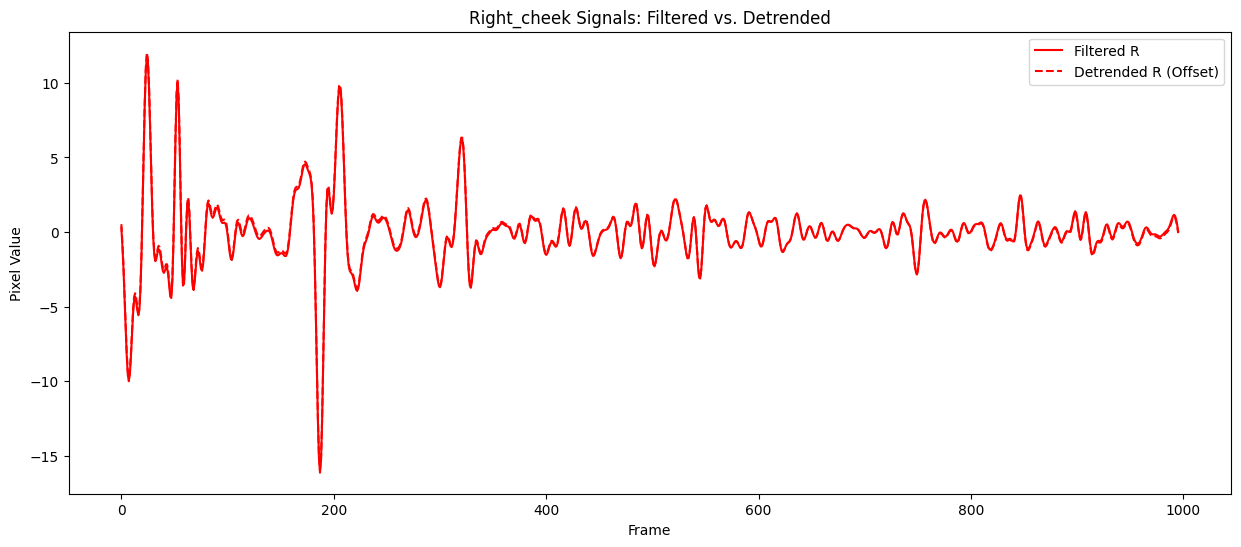

In [25]:
from scipy.signal import detrend

# Function to detrend the signals for each ROI
def detrend_roi_signals(filtered_signals):
    detrended_signals = {}
    for roi, signals in filtered_signals.items():
        detrended_signals[roi] = detrend(signals, axis=0)
    return detrended_signals

# Detrend the filtered signals for each ROI
detrended_signals = detrend_roi_signals(filtered_signals)

# Plot the detrended signals for each ROI
for roi, detrended_signal in detrended_signals.items():
    plot_signals2(filtered_signals[roi], detrended_signal, f'{roi.capitalize()} Signals: Filtered vs. Detrended')


### Processed Frame with Face Mesh and Highlighted ROIs

In [26]:
for roi, signals in filtered_signals.items():
    print(f"{roi}, filtered sample: {signals[:5]}")  # Print first 5 filtered values for each ROI

forehead, filtered sample: [[ 0.04361539  0.14367782  0.17433583]
 [ 0.1367644   0.35356151 -0.0146832 ]
 [ 0.20174307  0.5432782  -0.13512673]
 [ 0.20077882  0.67228372 -0.16126608]
 [ 0.08771847  0.67387502 -0.13327087]]
left_cheek, filtered sample: [[0.14423227 0.2805585  0.29884095]
 [1.81800202 2.13085561 2.35766291]
 [3.19979927 3.65732727 4.05443149]
 [4.06529062 4.61733426 5.12059544]
 [4.30397241 4.90263579 5.44233472]]
right_cheek, filtered sample: [[ 0.29255674  0.76522512  0.49575436]
 [-0.98302346  0.34074644  0.86672861]
 [-2.49455546 -0.34472505  0.89875085]
 [-4.32811191 -1.40903568  0.4011515 ]
 [-6.34402604 -2.7610376  -0.5877091 ]]


### Plot original vs. filtered signals for a specific ROI

### GRGB Calculation

In [27]:
flattened_detrend_signals = {roi + '_' + channel: [signal[i] for signal in signals for i in range(len(signal))] for roi, signals in detrended_signals.items() for channel in ['R', 'G', 'B']}

In [28]:
detrended_df = pd.DataFrame.from_dict(flattened_detrend_signals)

In [29]:
# import numpy as np

# def calculate_color_channel_ratios(detrended_df):
#     ratios = {}
#     for column_prefix in ['forehead', 'left_cheek', 'right_cheek']:
#         R = detrended_df[f'{column_prefix}_R'].values
#         G = detrended_df[f'{column_prefix}_G'].values
#         B = detrended_df[f'{column_prefix}_B'].values
#         GR_ratio = G / (R + 1e-6)  # Adding epsilon to avoid division by zero
#         GB_ratio = G / (B + 1e-6)
#         GRGB = GR_ratio + GB_ratio
#         ratios[column_prefix] = GRGB  # Storing the time series GRGB ratio for each ROI
    
#     return ratios

# # Calculate the color channel ratios
# color_channel_ratios = calculate_color_channel_ratios(detrended_df)


In [30]:
type(detrended_signals)

dict

In [31]:
detrended_signals1 = {key: value.tolist() for key, value in detrended_signals.items()}

dfdetrend = pd.DataFrame.from_dict(detrended_signals1)

In [32]:
dfdetrend

,forehead,left_cheek,right_cheek
0,"[0.07403491701453382, 0.17417550522022282, 0.2...","[0.07673929311493666, 0.20047474864547815, 0.2...","[0.5278313668314305, 0.9217409225113004, 0.588..."
1,"[0.16714613695474212, 0.38401112717439695, 0.0...","[1.7506354910564972, 2.050902374367423, 2.2608...","[-0.7481176925808761, 0.49700745109755795, 0.9..."
2,"[0.23208701085860814, 0.5736797454311121, -0.0...","[3.1325591824264607, 3.57750453572856, 3.95776...","[-2.2600185650984246, -0.18871882964656198, 0...."
3,"[0.23108496813567753, 0.7026371967702053, -0.1...","[3.9981769867695127, 4.537642033008344, 5.0240...","[-4.093943877283078, -1.2532842442563181, 0.49..."
4,"[0.11798682202385256, 0.7041804375572799, -0.0...","[4.236985223515715, 4.8230740670708565, 5.3459...","[-6.110226870190317, -2.6055409528393443, -0.4..."
...,...,...,...
991,"[-0.4750245660922394, -0.07888178449994943, 0....","[-1.6544978428783204, -0.6338505374995503, -1....","[1.024886353399298, 1.418323260922619, 2.53695..."
992,"[-0.42159170854784733, -0.10875989162780218, 0...","[-1.3721458777886018, -0.42490641101928817, -0...","[0.9706319914554096, 1.4250440533121838, 2.398..."
993,"[-0.3826023455033393, -0.16446880001058883, -0...","[-1.009701403447754, -0.2780920918716807, -0.7...","[0.7483635511348387, 1.1613204219326927, 1.891..."
994,"[-0.3347441991557402, -0.234600760191828, -0.2...","[-0.589647041598287, -0.20496065284065196, -0....","[0.38010738952005807, 0.650578465810112, 1.064..."


In [33]:
filtered_signals_lists = {key: value.tolist() for key, value in filtered_signals.items()}
df3 = pd.DataFrame(filtered_signals_lists)
df3.head()

,forehead,left_cheek,right_cheek
0,"[0.04361538924161712, 0.1436778227249978, 0.17...","[0.14423227380837003, 0.28055849511680864, 0.2...","[0.29255673885209466, 0.7652251242768472, 0.49..."
1,"[0.13676440265378798, 0.35356151208354347, -0....","[1.8180020228951834, 2.1308556141125714, 2.357...","[-0.9830234561470909, 0.34074644100450086, 0.8..."
2,"[0.20174307002961656, 0.5432781977446303, -0.1...","[3.1997992654104, 3.6573272687475264, 4.054431...","[-2.494555464251518, -0.34472505159822303, 0.8..."
3,"[0.2007788207786485, 0.6722837164880949, -0.16...","[4.065290620898705, 4.617334259301129, 5.12059...","[-4.328111912023051, -1.4090356780665831, 0.40..."
4,"[0.08771846813878609, 0.6738750246795411, -0.1...","[4.30397240879016, 4.902635786637459, 5.442334...","[-6.344026040517169, -2.761037598508213, -0.58..."


In [34]:
import numpy as np

def calculate_green_channel_ratio(filtered_signals):
    ratios = {}
    for column_prefix, signal_array in filtered_signals.items():
        G = signal_array[:, 1]  # Green channel is the second column (index 1)
        ratios[column_prefix] = G  # Storing the time series of the green channel for each ROI
    
    return ratios

# Calculate the green channel ratios
color_channel_ratios = calculate_green_channel_ratio(filtered_signals)


In [35]:
# import numpy as np

# def calculate_green_channel_ratio(detrended_df):
#     ratios = {}
#     for column_prefix in ['forehead', 'left_cheek', 'right_cheek']:
#         G = detrended_df[f'{column_prefix}_G'].values
#         ratios[column_prefix] = G  # Storing the time series of the green channel for each ROI
    
#     return ratios

# # Calculate the green channel ratios
# color_channel_ratios = calculate_green_channel_ratio(filtered_signals)


In [36]:
print(filtered_signals)

{'forehead': array([[ 0.04361539,  0.14367782,  0.17433583],
       [ 0.1367644 ,  0.35356151, -0.0146832 ],
       [ 0.20174307,  0.5432782 , -0.13512673],
       ...,
       [-0.37549296, -0.14723555, -0.02427676],
       [-0.32759702, -0.21731944, -0.17373125],
       [-0.26673509, -0.29364932, -0.29016133]]), 'left_cheek': array([[ 0.14423227,  0.2805585 ,  0.29884095],
       [ 1.81800202,  2.13085561,  2.35766291],
       [ 3.19979927,  3.65732727,  4.05443149],
       ...,
       [-1.06777214, -0.32760152, -0.77056731],
       [-0.64784422, -0.25460059, -0.51106644],
       [-0.19832121, -0.23130281, -0.2688677 ]]), 'right_cheek': array([[ 0.29255674,  0.76522512,  0.49575436],
       [-0.98302346,  0.34074644,  0.86672861],
       [-2.49455546, -0.34472505,  0.89875085],
       ...,
       [ 0.87937129,  1.25780925,  1.97179282],
       [ 0.51148399,  0.74732208,  1.14432735],
       [ 0.05854782,  0.08955515,  0.12865165]])}


In [37]:
detrended_df.head()

,forehead_R,forehead_G,forehead_B,left_cheek_R,left_cheek_G,left_cheek_B,right_cheek_R,right_cheek_G,right_cheek_B
0,0.074035,0.074035,0.074035,0.076739,0.076739,0.076739,0.527831,0.527831,0.527831
1,0.174176,0.174176,0.174176,0.200475,0.200475,0.200475,0.921741,0.921741,0.921741
2,0.217681,0.217681,0.217681,0.201845,0.201845,0.201845,0.588446,0.588446,0.588446
3,0.167146,0.167146,0.167146,1.750635,1.750635,1.750635,-0.748118,-0.748118,-0.748118
4,0.384011,0.384011,0.384011,2.050902,2.050902,2.050902,0.497007,0.497007,0.497007


In [38]:

# from scipy.stats import mstats

# def normalize_color_channel_ratios(color_channel_ratios):
#     normalized_ratios = {}
#     for roi, ratios in color_channel_ratios.items():
#         if isinstance(ratios, np.ndarray):
#             normalized_ratios[roi] = normalize_signal(ratios)
#     return normalized_ratios

# def normalize_signal(signal):
#     # Winsorize the data to handle outliers
#     winsorized_signal = mstats.winsorize(signal, limits=[0.05, 0.05])
    
#     # Normalize the data to a [0, 1] range
#     normalized_signal = (winsorized_signal - np.min(winsorized_signal)) / (np.max(winsorized_signal) - np.min(winsorized_signal))
    
#     return normalized_signal

# # Normalize the color channel ratios
# normalized_color_channel_ratios = normalize_color_channel_ratios(color_channel_ratios)


In [49]:
# from scipy.stats import zscore

# def normalize_ratios(ratios):
#     normalized_ratios = {}
#     for roi, grgb in ratios.items():
#         # Apply z-score normalization to mitigate the effect of outliers
#         normalized_ratios[roi] = zscore(grgb)
#     return normalized_ratios

# normalized_ratios = normalize_ratios(color_channel_ratios)

# # Display the first few normalized values of the GRGB ratio for each ROI to verify the normalization
# for roi, grgb in normalized_ratios.items():
#     print(f"{roi} first 5 normalized GRGB ratios: {grgb[:5]}")


In [50]:
# # Plot the normalized color channel ratios
# plt.figure(figsize=(12, 8))  # Increase figure size
# for roi, ratios in normalized_color_channel_ratios.items():
#     plt.plot(ratios, label=roi)

# # plt.title('Normalized Color Channel Ratios Over Time', fontsize=16) 
# plt.xlabel('Frame', fontsize=14)  
# plt.ylabel('Normalized Ratio', fontsize=14) 
# plt.legend(fontsize=12) 
# plt.grid(True)
# plt.ylim(0, 1.2) 
# plt.show()


In [51]:
# df_normalized_ratios = pd.DataFrame(normalized_color_channel_ratios)
# df_normalized_ratios.to_csv('normalized_color_channel_ratios.csv', index=False)

In [39]:
type(color_channel_ratios)

dict

In [40]:
df1 = pd.DataFrame(color_channel_ratios)

In [41]:
df1

,forehead,left_cheek,right_cheek
0,0.143678,0.280558,0.765225
1,0.353562,2.130856,0.340746
2,0.543278,3.657327,-0.344725
3,0.672284,4.617334,-1.409036
4,0.673875,4.902636,-2.761038
...,...,...,...
991,-0.061745,-0.683099,1.514303
992,-0.091575,-0.474285,1.521278
993,-0.147236,-0.327602,1.257809
994,-0.217319,-0.254601,0.747322


In [42]:
color_channel_ratios.values()

dict_values([array([ 1.43677823e-01,  3.53561512e-01,  5.43278198e-01,  6.72283716e-01,
        6.73875025e-01,  4.77020429e-01,  4.48098915e-02, -5.91611035e-01,
       -1.32510919e+00, -2.00000363e+00, -2.46584171e+00, -2.63370574e+00,
       -2.50835245e+00, -2.18044186e+00, -1.78242231e+00, -1.42925476e+00,
       -1.17193966e+00, -9.84529343e-01, -7.88307327e-01, -4.99267370e-01,
       -7.55604085e-02,  4.56291577e-01,  1.00652473e+00,  1.45488372e+00,
        1.69667408e+00,  1.68368504e+00,  1.44421981e+00,  1.07434627e+00,
        7.03076276e-01,  4.44344433e-01,  3.54703402e-01,  4.14370069e-01,
        5.39920101e-01,  6.22907087e-01,  5.76701575e-01,  3.70429186e-01,
        3.61140551e-02, -3.51059673e-01, -7.06851344e-01, -9.69081727e-01,
       -1.11283657e+00, -1.14670233e+00, -1.09632650e+00, -9.85990514e-01,
       -8.27350089e-01, -6.19014506e-01, -3.54433055e-01, -3.15405976e-02,
        3.42552415e-01,  7.54843698e-01,  1.19487302e+00,  1.66058614e+00,
        2.15

In [43]:
df1['forehead'].values.reshape(-1, 1)

array([[ 1.43677823e-01],
       [ 3.53561512e-01],
       [ 5.43278198e-01],
       [ 6.72283716e-01],
       [ 6.73875025e-01],
       [ 4.77020429e-01],
       [ 4.48098915e-02],
       [-5.91611035e-01],
       [-1.32510919e+00],
       [-2.00000363e+00],
       [-2.46584171e+00],
       [-2.63370574e+00],
       [-2.50835245e+00],
       [-2.18044186e+00],
       [-1.78242231e+00],
       [-1.42925476e+00],
       [-1.17193966e+00],
       [-9.84529343e-01],
       [-7.88307327e-01],
       [-4.99267370e-01],
       [-7.55604085e-02],
       [ 4.56291577e-01],
       [ 1.00652473e+00],
       [ 1.45488372e+00],
       [ 1.69667408e+00],
       [ 1.68368504e+00],
       [ 1.44421981e+00],
       [ 1.07434627e+00],
       [ 7.03076276e-01],
       [ 4.44344433e-01],
       [ 3.54703402e-01],
       [ 4.14370069e-01],
       [ 5.39920101e-01],
       [ 6.22907087e-01],
       [ 5.76701575e-01],
       [ 3.70429186e-01],
       [ 3.61140551e-02],
       [-3.51059673e-01],
       [-7.0

In [59]:
# df2 = pd.DataFrame(df_normalized_ratios)
# df2

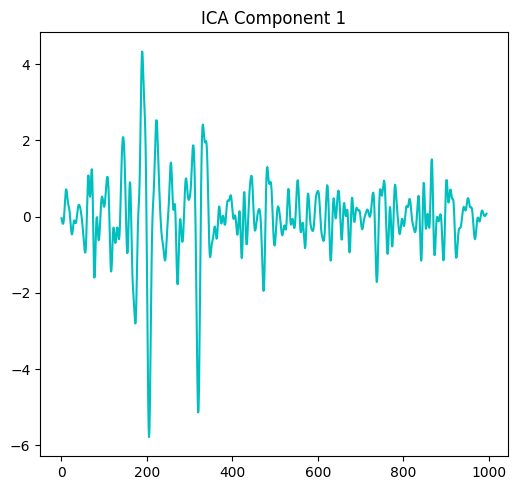

In [44]:
from sklearn.decomposition import FastICA

# X = df_normalized_ratios.values
# X = np.array(list(color_channel_ratios.values()))
X = df1['forehead'].values.reshape(-1, 1)

# Initialize and apply ICA
ica = FastICA(n_components=3, random_state=0)
S_ = ica.fit_transform(X) 
A_ = ica.mixing_ 

# Plot the independent components to identify the one most representative of the heart pulse
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i, (component, color) in enumerate(zip(S_.T, ['c', 'm', 'y']), start=1):
    plt.subplot(1, 3, i)
    plt.plot(component, color=color)
    plt.title(f'ICA Component {i}')
plt.tight_layout()
plt.show()


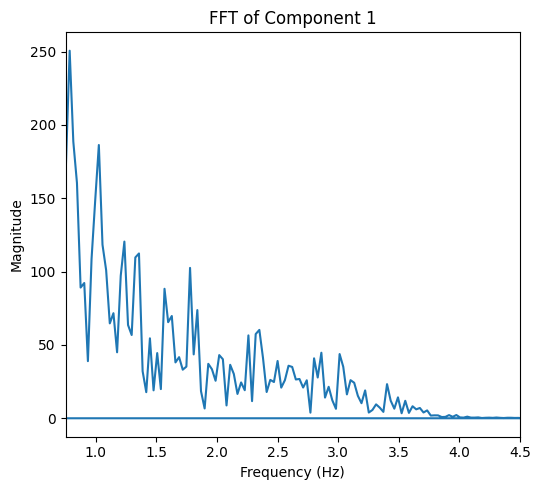

In [45]:
from scipy.fft import fft, fftfreq

fs = 30 
import numpy as np

# Compute the FFT and corresponding frequencies for each component again
fft_components = [fft(component) for component in S_.T]
freqs = fftfreq(X.shape[0], 1/fs)

# Plot the magnitude of the FFT for each component within the heart rate range (0.75 Hz to 4.5 Hz)
plt.figure(figsize=(15, 5))
for i, fft_component in enumerate(fft_components, start=1):
    plt.subplot(1, 3, i)
    plt.plot(freqs, np.abs(fft_component))
    plt.xlim(0.75, 4.5)  # Limit x-axis to target heart rate range
    plt.title(f'FFT of Component {i}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()


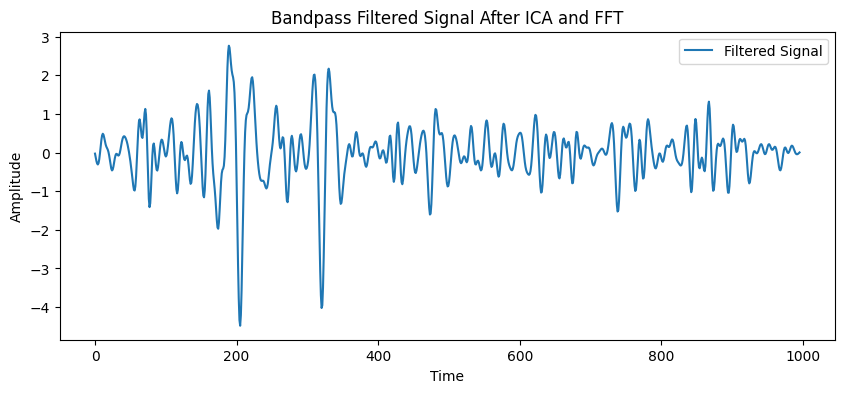

In [46]:
from scipy.signal import butter, filtfilt

# Function to design a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply a bandpass filter to a signal
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

most_representative_component = S_[:, 0]  # Second ICA component selected

# Define heart rate range in Hz (45 bpm to 270 bpm)
lowcut = 45 / 60.0
highcut = 270 / 60.0

# Apply bandpass filter to the most representative component
filtered_signal = butter_bandpass_filter(most_representative_component, lowcut, highcut, fs, order=2)

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(filtered_signal, label='Filtered Signal')
plt.title('Bandpass Filtered Signal After ICA and FFT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


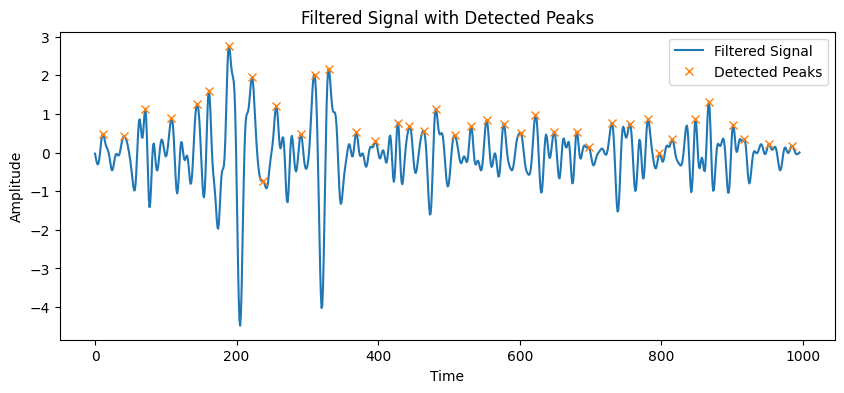

70.29804727646453

In [47]:
from scipy.signal import find_peaks

# Detect peaks in the filtered signal
peaks, _ = find_peaks(filtered_signal, distance=fs*0.5) 

# Calculate IBIs (Interbeat Intervals) in seconds
ibis = np.diff(peaks) / fs

# Calculate the average heart rate
if ibis.size > 0:
    avg_ibi = np.mean(ibis)
    heart_rate = 60 / avg_ibi  # Convert IBIs to heart rate in beats per minute (bpm)
else:
    heart_rate = 0  # No peaks detected, indicating no heart rate could be calculated

# Plot the filtered signal with detected peaks
plt.figure(figsize=(10, 4))
plt.plot(filtered_signal, label='Filtered Signal')
plt.plot(peaks, filtered_signal[peaks], "x", label='Detected Peaks')
plt.title('Filtered Signal with Detected Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

heart_rate

In [48]:
# Convert IBIs to a DataFrame for export
ibi_df = pd.DataFrame(ibis, columns=['IBI'])

# Save the IBI time series to a CSV file
ibi_csv_path = 'ibi_time_series.csv'
ibi_df.to_csv(ibi_csv_path, index=False)

ibi_csv_path

'ibi_time_series.csv'

### Validation based on Supplied BVP data with original UBFC-Phys dataset 

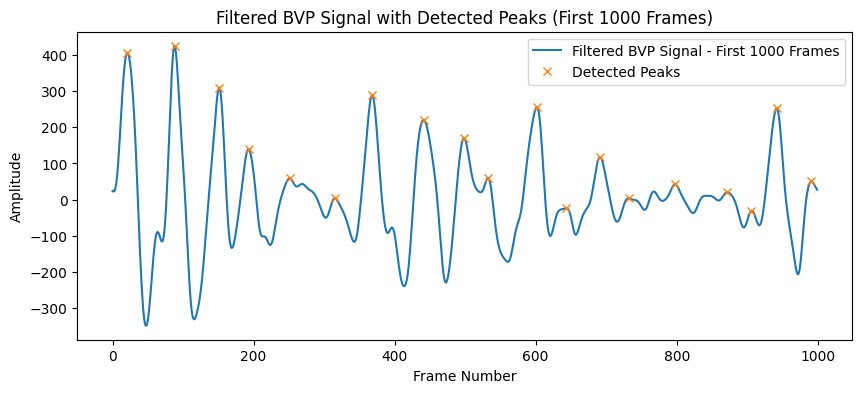

(71.25773195876289, array([1.046875, 0.984375, 0.65625 , 0.90625 , 1.      ]))

In [49]:
# bvp_path = 'dataset/s2/bvp_s2_T1.csv'
bvp_path = 'bvp_s1_T2.csv'

bvp_df = pd.read_csv(bvp_path)

fs_bvp = 64  # Hz, the sampling rate for BVP signals

# Redo the analysis using the first 1000 frames of the BVP data
filtered_bvp_signal_1000 = butter_bandpass_filter(bvp_df.values.flatten()[:1000], 0.5, 3.5, fs_bvp, order=2)

# Detect peaks in the filtered BVP signal limited to first 1000 frames
peaks_bvp_1000, _ = find_peaks(filtered_bvp_signal_1000, distance=fs_bvp*0.5)

# Calculate IBIs from BVP signal
ibis_bvp_1000 = np.diff(peaks_bvp_1000) / fs_bvp

# Calculate average heart rate from IBIs
if ibis_bvp_1000.size > 0:
    avg_heart_rate_bvp_1000 = 60 / np.mean(ibis_bvp_1000)
else:
    avg_heart_rate_bvp_1000 = 0  # No IBIs

# Plot the filtered BVP signal with detected peaks for visualization
plt.figure(figsize=(10, 4))
plt.plot(filtered_bvp_signal_1000, label='Filtered BVP Signal - First 1000 Frames')
plt.plot(peaks_bvp_1000, filtered_bvp_signal_1000[peaks_bvp_1000], "x", label='Detected Peaks')
plt.title('Filtered BVP Signal with Detected Peaks (First 1000 Frames)')
plt.xlabel('Frame Number')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

avg_heart_rate_bvp_1000, ibis_bvp_1000[:5]  # Show the average heart rate and the first few IBIs for reference


In [50]:
import numpy as np
from scipy.signal import butter, filtfilt, detrend, find_peaks
from scipy.fft import fft, fftfreq
from scipy.stats import zscore

class HeartMetricsCalculator:
    def __init__(self, fs=30):
        self.fs = fs

    @staticmethod
    def moving_average(data, window_size):
        return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

    @staticmethod
    def compute_IBI(peaks, fs):
        return np.diff(peaks) / fs

    @staticmethod
    def calculate_baevsky_stress_index(ibi):
        hist, bin_edges = np.histogram(ibi, bins=np.arange(0, max(ibi) + 0.05, 0.05))
        amplitude = np.max(hist) / len(ibi)
        sdnn = np.std(ibi)
        bsi = amplitude / (2 * 3.92 * sdnn) * 10
        return bsi

    def calculate_hrv_metrics(self, ibi):
        sdnn = np.std(ibi)
        rmssd = np.sqrt(np.mean(np.square(np.diff(ibi))))
        bsi = self.calculate_baevsky_stress_index(ibi)
        frequencies = fftfreq(len(ibi), d=np.mean(ibi) if len(ibi) > 0 else 0)
        power_spectrum = np.abs(fft(ibi))**2
        lf_band = (0.04, 0.15)
        hf_band = (0.15, 0.4)
        lf_power = np.sum(power_spectrum[(frequencies >= lf_band[0]) & (frequencies < lf_band[1])])
        hf_power = np.sum(power_spectrum[(frequencies >= hf_band[0]) & (frequencies < hf_band[1])])
        lf_hf_ratio = lf_power / hf_power if hf_power != 0 else np.nan
        return sdnn, rmssd, bsi, lf_hf_ratio


### HRV Metrics Comparison

In [51]:
# Initialize calculators for both datasets
fs_current = 30
calculator_current = HeartMetricsCalculator(fs=fs_current)
fs_bvp = 64
calculator_bvp = HeartMetricsCalculator(fs=fs_bvp)

# Calculate HRV metrics for both datasets
sdnn_current, rmssd_current, bsi_current, lf_hf_ratio_current = calculator_current.calculate_hrv_metrics(ibis)
sdnn_bvp, rmssd_bvp, bsi_bvp, lf_hf_ratio_bvp = calculator_bvp.calculate_hrv_metrics(ibis_bvp_1000)

# Calculate average heart rates from IBIs
avg_heart_rate_current = 60 / np.mean(ibis) if ibis.size > 0 else 0
avg_heart_rate_bvp_1000 = 60 / np.mean(ibis_bvp_1000) if ibis_bvp_1000.size > 0 else 0

# Display the HRV metrics and heart rates for both methods
hrv_metrics_comparison = pd.DataFrame({
    'Metric': ['Heart Rate', 'SDNN', 'RMSSD', 'BSI', 'LF/HF Ratio'],
    'Current Calculation': [avg_heart_rate_current, sdnn_current, rmssd_current, bsi_current, lf_hf_ratio_current],
    'BVP Dataset Calculation': [avg_heart_rate_bvp_1000, sdnn_bvp, rmssd_bvp, bsi_bvp, lf_hf_ratio_bvp]
})

print(hrv_metrics_comparison)

        Metric  Current Calculation  BVP Dataset Calculation
0   Heart Rate            70.298047                71.257732
1         SDNN             0.236265                 0.208456
2        RMSSD             0.363582                 0.311395
3          BSI             0.568279                 1.019806
4  LF/HF Ratio             0.315435                 0.141869


In [52]:
from datetime import datetime

current_metrics = hrv_metrics_comparison[['Metric', 'Current Calculation']].copy()
current_metrics['Timestamp'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
# print(current_metrics)
current_metrics.rename(columns={'Current Calculation': 'Calculation'}, inplace=True)
# Generate a new filename each time
filename = f"hrv_metrics_{np.random.randint(1000)}.csv"


# Save the DataFrame as CSV
current_metrics.to_csv(filename, index=False)
current_metrics

,Metric,Calculation,Timestamp
0,Heart Rate,70.298047,2024-06-11 20:31:44
1,SDNN,0.236265,2024-06-11 20:31:44
2,RMSSD,0.363582,2024-06-11 20:31:44
3,BSI,0.568279,2024-06-11 20:31:44
4,LF/HF Ratio,0.315435,2024-06-11 20:31:44


In [53]:
current_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Metric       5 non-null      object 
 1   Calculation  5 non-null      float64
 2   Timestamp    5 non-null      object 
dtypes: float64(1), object(2)
memory usage: 248.0+ bytes


# Statistial analysis

In [54]:
from scipy.stats import ttest_rel, wilcoxon

# Perform paired t-test and Wilcoxon signed-rank test on the metrics
# Wilcoxon test is used as a non-parametric alternative to the paired t-test

# Convert metrics to numpy arrays for statistical testing
previous_metrics = np.array([sdnn_current, rmssd_current, bsi_current, lf_hf_ratio_current])
bvp_metrics = np.array([sdnn_bvp, rmssd_bvp, bsi_bvp, lf_hf_ratio_bvp])

# Paired t-test
t_test_stat, t_test_p = ttest_rel(previous_metrics, bvp_metrics)

# Wilcoxon signed-rank test
wilcoxon_stat, wilcoxon_p = wilcoxon(previous_metrics, bvp_metrics)

t_test_stat, t_test_p, wilcoxon_stat, wilcoxon_p


(-0.35928349551336813, 0.7431831409259346, 4.0, 0.875)

In [242]:
# These statistical tests suggest that there are no statistically significant differences between the two sets of HRV metrics at the conventional alpha level of 0.05. The p-values indicate that the observed differences in HRV metrics could likely be due to random variation rather than systematic differences between the methodologies used to calculate them.

In [52]:
# # First, let's load the provided data into a DataFrame to understand its structure
# import pandas as pd

# # Load the data from the uploaded CSV file
# df = pd.read_csv('hrv_metrics_635.csv')

# # Display the first few rows of the dataframe to understand its structure
# df.head()


,Metric,Calculation,Timestamp
0,Heart Rate,70.298047,2024-06-10 21:09:05
1,SDNN,0.194897,2024-06-10 21:09:05
2,RMSSD,0.283161,2024-06-10 21:09:05
3,BSI,1.033349,2024-06-10 21:09:05
4,LF/HF Ratio,0.119632,2024-06-10 21:09:05


In [55]:
df = hrv_metrics_comparison.copy()

In [61]:
hrv_metrics_comparison.to_csv('hrv_metrics_comparison_t2.csv')

In [56]:
df

,Metric,Current Calculation,BVP Dataset Calculation
0,Heart Rate,70.298047,71.257732
1,SDNN,0.236265,0.208456
2,RMSSD,0.363582,0.311395
3,BSI,0.568279,1.019806
4,LF/HF Ratio,0.315435,0.141869


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize dictionaries to hold the calculation results for each metric
mae_results = {}
rmse_results = {}
correlation_results = {}

# Iterate over each unique metric in the dataset
for metric in df['Metric'].unique():
    # Filter the dataframe for the current metric
    metric_df = df[df['Metric'] == metric]
    
    # Calculate MAE
    mae = mean_absolute_error(metric_df['Current Calculation'], metric_df['BVP Dataset Calculation'])
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(metric_df['Current Calculation'], metric_df['BVP Dataset Calculation']))
    
    # Calculate correlation coefficient
    correlation = np.corrcoef(metric_df['Current Calculation'], metric_df['BVP Dataset Calculation'])[0, 1]
    
    # Store the results in the dictionaries
    mae_results[metric] = mae
    rmse_results[metric] = rmse
    correlation_results[metric] = correlation

# Convert the results to DataFrames for better visualization
mae_df = pd.DataFrame(list(mae_results.items()), columns=['Metric', 'MAE'])
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Metric', 'RMSE'])
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Metric', 'Correlation'])

(mae_df, rmse_df, correlation_df)


(        Metric       MAE
 0   Heart Rate  0.959685
 1         SDNN  0.027808
 2        RMSSD  0.052187
 3          BSI  0.451528
 4  LF/HF Ratio  0.173566,
         Metric      RMSE
 0   Heart Rate  0.959685
 1         SDNN  0.027808
 2        RMSSD  0.052187
 3          BSI  0.451528
 4  LF/HF Ratio  0.173566,
         Metric  Correlation
 0   Heart Rate          NaN
 1         SDNN          NaN
 2        RMSSD          NaN
 3          BSI          NaN
 4  LF/HF Ratio          NaN)

In [58]:
# Calculate the relative error between the current calculation and the BVP dataset calculation
df['Relative Error'] = abs(df['Current Calculation'] - df['BVP Dataset Calculation']) / df['BVP Dataset Calculation']
df['Accuracy'] = 1 - df['Relative Error']
accuracy_by_metric = df.groupby('Metric')['Accuracy'].mean().reset_index()
print(accuracy_by_metric)

        Metric  Accuracy
0          BSI  0.557242
1   Heart Rate  0.986532
2  LF/HF Ratio -0.223428
3        RMSSD  0.832408
4         SDNN  0.866598


In [59]:
df.groupby('Metric')['Accuracy'].mean().reset_index()['Accuracy'].to_csv('Accuracy.csv')

In [60]:
df.groupby('Metric')['Accuracy'].mean().reset_index()['Accuracy']

0    0.557242
1    0.986532
2   -0.223428
3    0.832408
4    0.866598
Name: Accuracy, dtype: float64